In [17]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# 2変数間の記述統計
## 共分散(covariance)
2変数間の相関関係を表す指標
$$ s_{xy}  = \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})((y_i - \bar{y}) $$
※xの分散$ s_{x}^2  = \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2 $  
yの分散$ s_{y}^2  = \frac{1}{n}\sum_{i=1}^n(y_i - \bar{y})^2 $

## 共分散行列(covariance matrix)
複数の変数間の分散と共分散を行列にしたもの。**分散共分散行列ともいう**  
変数が多くなると、行列で扱えた方が便利(拡張性がある)  
pythonで分散を求めるメソッドではこの共分散行列を返すことが多い
$$
S = 
\begin{bmatrix}
s_{x}^2 & s_{xy} \\
s_{yx} & s_{y}^2 \\
\end{bmatrix}
$$

変数が$X_1, X_2, ..., X_n$の場合
$$
S = 
\begin{bmatrix}
s_{11} & s_{12} & ... & s_{1n} \\
s_{21} & s_{22} & ... & s_{2n} \\
. & . & . & . \\
. & . & . & . \\
s_{n1} & s_{n2} & ... & s_{nn} \\
\end{bmatrix}
$$


In [4]:
# 共分散
# bias=Trueを指定しないと、npはデフォルトでn-1で割る不偏共分散を出すので注意
np.cov(df["total_bill"], df["tip"], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [7]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [8]:
# 以下の方法でも、不偏共分散行列が出せる
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数(correlation coefficient)
共分散を見るだけではその2変数間に相関があるのかがわからなかった。=>共分散を標準化したのが相関係数  
共分散の取りうる値を計算し、-1~1の範囲にすることを考える  
共分散の取りうる値は以下のように表現できる($S_x$はxの標準偏差、$S_y$はyの標準偏差)(以下の関係の導出はnotionを参照にせよ)
$$-S_x S_y \leq S_{xy} \leq  S_x S_y$$
よって、両辺を$S_x S_y$で割ることにより、
$$-1 \leq \frac{S_{xy}}{S_x S_y} \leq  1$$
$\frac{S_{xy}}{S_x S_y}$を**ピアソンの積率相関係数**という

## 相関行列(corelation matrix)
複数の変数間の相関係数を行列で表した物  
対角要素は1になる
$$
S = 
\begin{bmatrix}
1 & r_{12} & ... & r_{1n} \\
r_{21} & 1 & ... & r_{2n} \\
. & . & . & . \\
. & . & . & . \\
r_{n1} & r_{n2} & ... & 1 \\
\end{bmatrix}
$$

In [9]:
# 相関係数
np.corrcoef(df["total_bill"], df["tip"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [11]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.corrcoef(x)
# total_billとtipの相関が強いことがわかる tipとsizeの相関は、他に比べて比較的に低い

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [12]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

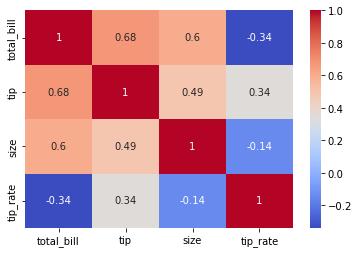

In [16]:
# 相関係数行列はヒートマップを使うと見やすい
# sns.heatmap(df.corr())
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

※共分散、相関係数は連続変数に対する相関の強さの指標なので、カテゴリ変数(sex, somokerなどのカラム)は抜け落ちる
カテゴリ変数間の相関の強さを表すには**連関**という指標が必要
## 連関(association)
カテゴリ変数(取りうる値について大小がない値、それぞれの値が対等)間の相関関係を表す。  
 **分割表(contingency table)** を用いて計算する  
分割表内の数字を **観測度数(observed frequency)** という

In [20]:
# まず　pandasのcrosstabメソッドから分割表を作る
pd.crosstab(df["sex"], df["time"])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


## 期待度数(expected frequencies)
連関が無いと想定した場合の度数

In [26]:
cont_table = pd.crosstab(df["sex"], df["time"])
chi2, x, y, exp_table = stats.chi2_contingency(cont_table, correction=False)
# タプルの一つ目がカイ二乗値、4つ目の行列が期待度数の行列
pd.DataFrame(data=exp_table, index=["Lunch", "Dinner"], columns=["Male","Female"])

,Male,Female
Lunch,43.754098,113.245902
Dinner,24.245902,62.754098


## カイ二乗(chi squared)
観測度数が期待度数からどれくらい離れているかを計算した値  
$\frac{(観測度数-期待度数)^2}{期待度数}$  
の総和

In [27]:
chi2

10.277251918677742

## クラメールの連関係数
連関の強さを表す指標  
カイ二乗は度数の値が大きいと、値が大きくなってしまい、比較できない=>カイ二乗を標準化したものがクラメールの連関係数  
カイ二乗を0~1に標準化した値 
$$V = \sqrt{\frac{\chi^2}{(min(a,b) -1 )N}}$$
aは行数、bは列数、Vはクラメールの連関係数

In [32]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    # shapeメソッドによって、行と列の大きさがタプルで返される
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [31]:
cramers_v(df["sex"], df["time"])

0.20523129613344476